In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Data Preparation

In [5]:
df = pd.read_csv('train.csv')
print(df.shape)

(42000, 785)


In [6]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [7]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data = df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [9]:
X  = data[:, 1:]
Y = data[:,0]

print(X.shape, Y.shape)

(42000, 784) (42000,)


In [12]:
# creating training and testing data

split = int(0.8*X.shape[0])
print(split) #these many samples would go into my traning data 

X_train = X[:split,:]
Y_train = Y[:split]

X_test = X[split:,:]
Y_test = Y[split:]

print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

33600
(33600, 784) (33600,) (8400, 784) (8400,)


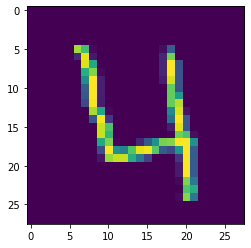

4


In [14]:
# visualise some training data

def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img)
    plt.show()
    
drawImg(X_train[3])

print(Y_train[3])

Apply KNN

In [17]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))


def knn(X,Y,queryPoint,k=5): # k is how many neighbours i want to consider
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d, Y[i])) # we are going to append two things 1st is distance and 2nd is label # dist is at 1st coz sorting based on this 
    
    #sorting
    vals  = sorted(vals)
    
    #Nearest k points
    vals = vals[:k] #discard points which are after k 
    
    vals = np.array(vals) # convert to numpy array  
    
    #print(vals)
    
    # we do not need distance now
    new_vals = np.unique(vals[:,1], return_counts = True)
    print(new_vals)
    
    max_freq_index = new_vals[1].argmax()
    
    prediction = new_vals[0][max_freq_index]
    
    return prediction

Make Predictions

In [19]:
pred = knn(X_train,Y_train,X_test[0]) #k is default here

print(int(pred))

(array([0.]), array([5], dtype=int64))
0


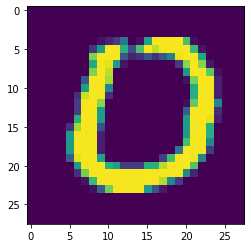

0


In [20]:
drawImg(X_test[0])
print(Y_test[0])

In [21]:
pred = knn(X_train,Y_train,X_test[1]) #k is default here

print(int(pred))

(array([7.]), array([5], dtype=int64))
7


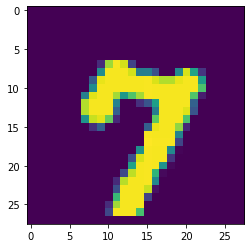

7


In [22]:
drawImg(X_test[1])
print(Y_test[1])